In [14]:
import numpy as np
grid = np.zeros((100,100), dtype="int")
def update_grid(grid):
    h, w = grid.shape
    new_grid = np.zeros((h,w), dtype="int")
    for i in range(h):
        for j in range(w):
            n = 0 #neighbour count
            for k in range(i-1, i+2):
                for l in range(j-1, j+2):
                    if(k!=i or l!=j):
                        if(k>=0 and l>=0 and k<h and l<w):
                            n = n + grid[k,l]
            if grid[i,j]==0:
                if n==3:
                    new_grid[i,j]=1
            else:
                if(n==2 or n==3):
                    new_grid[i,j]=1
    return new_grid
    

In [15]:
grid[2,0]=1
grid[2,1]=1
grid[2,2]=1
grid[1,2]=1
grid[0,1]=1

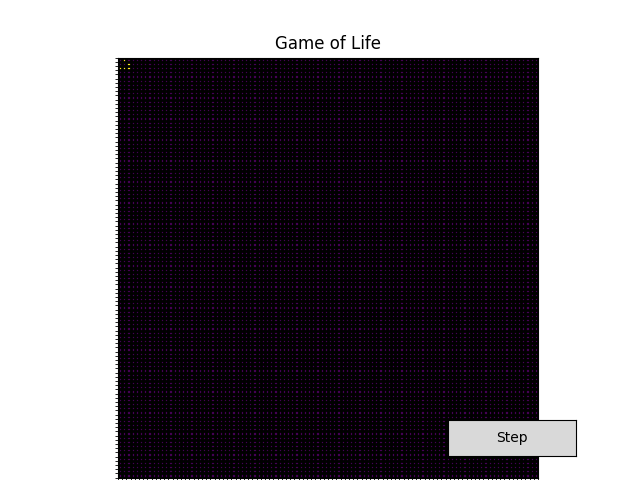

In [17]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.005)
cax = ax.imshow(grid, cmap='viridis', interpolation='nearest')


ax.set_xticks(np.arange(-0.5, grid.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-0.5, grid.shape[0], 1), minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
ax.tick_params(which="major", bottom=False, left=False, labelbottom=False, labelleft=False)
plt.title("Game of Life")

def on_button_click(event):
    global grid
    grid = update_grid(grid)
    cax.set_data(grid)
    fig.canvas.draw_idle()

def on_click(event):
    if event.inaxes == ax:
        # Get the clicked cell's indices
        col = int(event.xdata+0.5)  # Column index
        row = int(event.ydata+0.5)  # Row index
        
        # Toggle the cell's value between 0 and 1
        grid[row, col] = (grid[row, col] + 1)%2
        cax.set_data(grid)
        fig.canvas.draw_idle()
        
fig.canvas.mpl_connect('button_press_event', on_click)

ax_button = plt.axes([0.7, 0.05, 0.2, 0.075])  
button = Button(ax_button, "Step")
button.on_clicked(on_button_click)

plt.show()